In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import utils
# %matplotlib inline

In [28]:
learning_rate = 0.1

In [68]:
# try differnt data
# x,y = utils.read_data(x="s1", y="s2", p="./data/normalized_diabetes.csv")

# a = np.loadtxt('./data/LR.txt')
# x = a[:,1]
# y = a[:,2]

# generate data with theta_0 = 4 theta_1 = 3
sample_size = 300
x = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * x + np.random.randn(sample_size, 1)


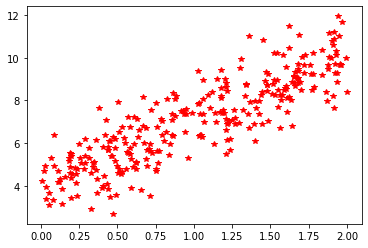

In [69]:
plt.plot(x, y, '*r')

In [71]:
[ha,hb,hallSSE] = utils.draw_hill(x,y)
hallSSE = hallSSE.T

[-20.         -19.5959596  -19.19191919 -18.78787879 -18.38383838
 -17.97979798 -17.57575758 -17.17171717 -16.76767677 -16.36363636
 -15.95959596 -15.55555556 -15.15151515 -14.74747475 -14.34343434
 -13.93939394 -13.53535354 -13.13131313 -12.72727273 -12.32323232
 -11.91919192 -11.51515152 -11.11111111 -10.70707071 -10.3030303
  -9.8989899   -9.49494949  -9.09090909  -8.68686869  -8.28282828
  -7.87878788  -7.47474747  -7.07070707  -6.66666667  -6.26262626
  -5.85858586  -5.45454545  -5.05050505  -4.64646465  -4.24242424
  -3.83838384  -3.43434343  -3.03030303  -2.62626263  -2.22222222
  -1.81818182  -1.41414141  -1.01010101  -0.60606061  -0.2020202
   0.2020202    0.60606061   1.01010101   1.41414141   1.81818182
   2.22222222   2.62626263   3.03030303   3.43434343   3.83838384
   4.24242424   4.64646465   5.05050505   5.45454545   5.85858586
   6.26262626   6.66666667   7.07070707   7.47474747   7.87878788
   8.28282828   8.68686869   9.09090909   9.49494949   9.8989899
  10.3030303 

Text(0, 0.5, 'b')

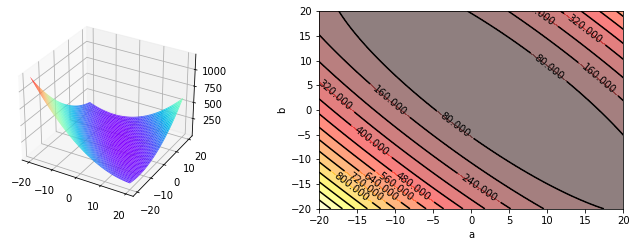

In [72]:
fig = plt.figure(1, figsize=(12, 8))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.set_top_view()
ax.plot_surface(ha, hb, hallSSE, rstride=2, cstride=2, cmap='rainbow')

plt.subplot(2,2,2)
ta = np.linspace(-20, 20, 100)
tb = np.linspace(-20, 20, 100)
plt.contourf(ha,hb,hallSSE,15,alpha=0.5,cmap=plt.cm.hot)
C = plt.contour(ha,hb,hallSSE,15,colors='black')
plt.clabel(C,inline=True)
plt.xlabel('a')
plt.ylabel('b')

In [80]:
plt.ion()
# init a,b value
a = 10.0
b = 20.0

all_loss = []
all_step = []
last_a = a
last_b = b

for step in range(1,100):
    loss = 0
    all_da = 0
    all_db = 0
    for i in range(0, len(x)):
        y_p = a*x[i] + b
        loss = loss + (y[i] - y_p)*(y[i] - y_p)/2
        all_da = all_da + utils.da(y[i], y_p, x[i])
        all_db = all_db + utils.db(y[i], y_p)
    loss = loss/len(x)
    all_loss.append(loss)
    all_step.append(step)

    # update param
    last_a = a
    last_b = b
    a = a - learning_rate * all_da
    b = b - learning_rate * all_db

    if step % 5 == 0:
        print("step: ", step, " loss: ", loss, " a: ", a, " b: ", b)
    #     plt.show()
    #     plt.pause(0.01)

step:  5  loss:  [8.41229757e+16]  a:  [-1.37296136e+10]  b:  [-1.1573321e+10]
step:  10  loss:  [1.10978511e+35]  a:  [1.57695947e+19]  b:  [1.32929084e+19]
step:  15  loss:  [1.46407445e+53]  a:  [-1.8112678e+28]  b:  [-1.52679999e+28]
step:  20  loss:  [1.93146762e+71]  a:  [2.08039021e+37]  b:  [1.7536555e+37]
step:  25  loss:  [2.54807202e+89]  a:  [-2.38949945e+46]  b:  [-2.01421774e+46]
step:  30  loss:  [3.36152207e+107]  a:  [2.74453687e+55]  b:  [2.31349492e+55]
step:  35  loss:  [4.43465905e+125]  a:  [-3.15232657e+64]  b:  [-2.6572394e+64]
step:  40  loss:  [5.85038576e+143]  a:  [3.62070663e+73]  b:  [3.05205825e+73]
step:  45  loss:  [7.71807104e+161]  a:  [-4.15867969e+82]  b:  [-3.5055402e+82]
step:  50  loss:  [1.01819988e+180]  a:  [4.77658604e+91]  b:  [4.02640156e+91]
step:  55  loss:  [1.34325142e+198]  a:  [-5.48630237e+100]  b:  [-4.62465372e+100]
step:  60  loss:  [1.77207287e+216]  a:  [6.30147e+109]  b:  [5.31179559e+109]
step:  65  loss:  [2.33779187e+234]  a

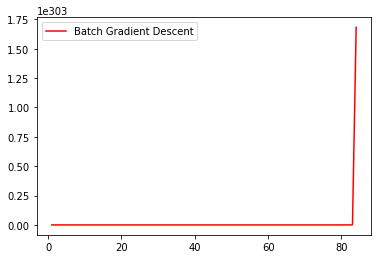

In [81]:
plt.plot(all_step, all_loss, color='red', label='Batch Gradient Descent')
plt.legend(loc='best')

plt.show()

In [83]:
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m)* np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X, y, theta, learning_rate=0.01, iterations = 100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))

    for it in range (iterations):
        predictions = np.dot(X, theta)

        theta = theta - (1/m)*learning_rate*(X.T.dot((predictions - y)))
        theta_history[it,:] = theta.T 
        cost_history[it] = cal_cost(theta, X, y)

    return theta, cost_history, theta_history

In [85]:
X = x
y = y

In [111]:
learning_rate = 0.01
epochs = 100

theta = np.random.randn(2, 1)

# cbind
X_b = np.c_[np.ones((len(X), 1)), X]

theta, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, epochs)

print("Theta0:", theta[0], "\nTheta1:", theta[1])
print("Final cost/MSE", cost_history[-1])

Theta0: [2.32477459] 
Theta1: [4.005915]
Final cost/MSE 82968.2854356465


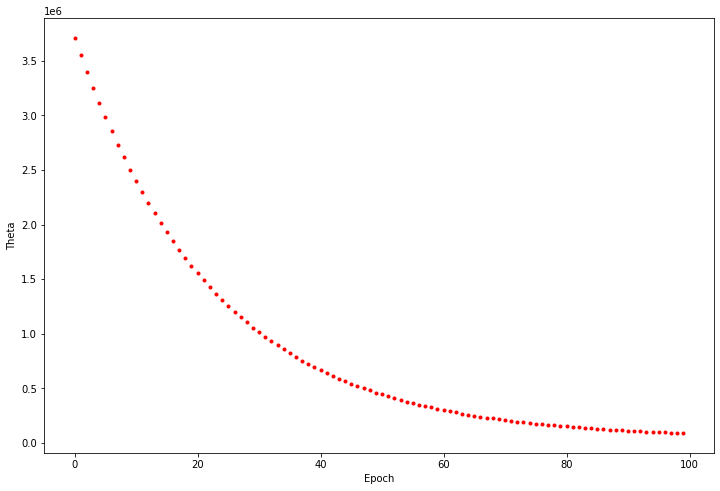

In [104]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('Theta')
ax.set_xlabel('Epoch')
_=ax.plot(range(epochs), cost_history, 'r.')

In [101]:
def SGD(X, y, theta, learning_rate=0.01, iterations =10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_index = np.random.randint(0, m)
            X_i = X[rand_index, :].reshape(1, X.shape[1])
            y_i = y[rand_index].reshape(1,1)
            prediction = np.dot(X_i, theta)

            theta = theta - (1/m)*learning_rate*(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)
        cost_history[it] = cost 
    return theta, cost_history

In [105]:
learning_rate = 0.01
epochs = 100

theta = np.random.randn(2, 1)

X_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history = SGD(X_b, y, theta, learning_rate, epochs)

print("Theta0:", theta[0], "\nTheta1:", theta[1])
print("Final cost/MSE", cost_history[-1])

Theta0: [3.0264087] 
Theta1: [3.13678593]
Final cost/MSE 261.71480945785976


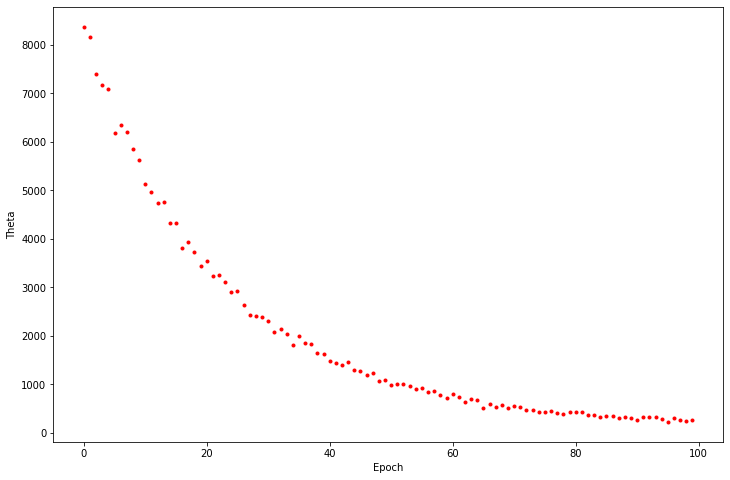

In [106]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('Theta')
ax.set_xlabel('Epoch')
_=ax.plot(range(epochs), cost_history, 'r.')

In [107]:
def minibatchGD(X, y, theta, learning_rate=0.01, iterations =10, batch_size = 200):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)

    for it in range(iterations):
        cost = 0.0

        indices = np.random.permutation(m)

        X = X[indices]
        y = y[indices]
        for i in range(0, m, batch_size):
            # a batch of X
            X_i = X[i: i+batch_size]
            y_i = y[i: i+batch_size]

            X_i = np.c_[np.ones((len(X_i), 1)), X_i]
            prediction = np.dot(X_i, theta)

            theta = theta - (1/m)*learning_rate*(X_i.T.dot((prediction - y_i)))

            cost += cal_cost(theta, X_i, y_i)
        
        cost_history[it] = cost
    return theta, cost_history

In [116]:
learning_rate = 0.01
epochs = 100

theta = np.random.randn(2, 1)

theta, cost_history = minibatchGD(X, y, theta, learning_rate, epochs, batch_size = 20)

print("Theta0:", theta[0], "\nTheta1:", theta[1])
print("Final cost/MSE", cost_history[-1])

Theta0: [3.91676982] 
Theta1: [2.40416273]
Final cost/MSE 5071.826924449874


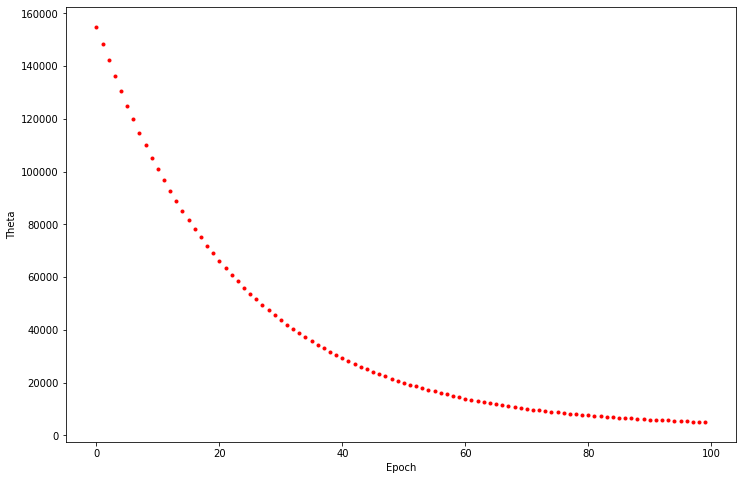

In [117]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('Theta')
ax.set_xlabel('Epoch')
_=ax.plot(range(epochs), cost_history, 'r.')